In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
import opendatasets as od
dataset_url="https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps"
od.download(dataset_url)
df=pd.read_csv('./google-playstore-apps/Google-Playstore.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle username:

  vaishalibobade


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps


100%|██████████| 207M/207M [00:10<00:00, 19.8MB/s] 


# Knowing The Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [5]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


* Developer Id', 'Developer Website','Developer Email','Scraped Time' this columns are not that much usefull for EDA , we will not get any meaningful insights from this column so we will drop this columns

In [6]:
df['Currency'].value_counts()

Currency
USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: count, dtype: int64



* Also Currency column aslo dont have data distribution that much effective so we will exclude this column as well.

In [7]:
columns=['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price',
       'Size', 'Minimum Android', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice']
app_df=pd.read_csv('./google-playstore-apps/Google-Playstore.csv',usecols=columns)
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Size              object 
 11  Minimum Android   object 
 12  Released          object 
 13  Last Updated      object 
 14  Content Rating    object 
 15  Privacy Policy    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(10)
memory usage: 273.5+ MB


In [8]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_col=app_df.select_dtypes(include=numerics)
numeric_col.columns

Index(['Rating', 'Rating Count', 'Minimum Installs', 'Maximum Installs',
       'Price'],
      dtype='object')

* We will now check the duplication of data

In [9]:
app_df.duplicated().any()

False

* There is no entire row duplication , Now we have to check if there is any duplication about app

In [10]:
app_df['App Name'].duplicated().any()

True

* It seems that there are duplicates names of app. Lets check if there any dupliaction regarding App ID 

In [11]:
app_df['App Id'].duplicated().any()

False

 *  It seems that there is no App Id duplication. so Each App is unique and we can ignore app Name dupliaction.

In [12]:
app_df['Released']=pd.to_datetime(app_df['Released'])
app_df['Last Updated']=pd.to_datetime(app_df['Last Updated'])
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   App Id            object        
 2   Category          object        
 3   Rating            float64       
 4   Rating Count      float64       
 5   Installs          object        
 6   Minimum Installs  float64       
 7   Maximum Installs  int64         
 8   Free              bool          
 9   Price             float64       
 10  Size              object        
 11  Minimum Android   object        
 12  Released          datetime64[ns]
 13  Last Updated      datetime64[ns]
 14  Content Rating    object        
 15  Privacy Policy    object        
 16  Ad Supported      bool          
 17  In App Purchases  bool          
 18  Editors Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 273.5+ 

In [13]:
app_df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [14]:
app_df['Rating Type']='No Rating Provied'

In [15]:
app_df.loc[(app_df['Rating Count']>0)  & (app_df['Rating Count']<=1000),'Rating Type']='Less Than 1K'
app_df.loc[(app_df['Rating Count']>1000) & (app_df['Rating Count']<=10000),'Rating Type']='Between 1k to 10K'
app_df.loc[(app_df['Rating Count']>10000) & (app_df['Rating Count']<=50000),'Rating Type']='Between 10k to 50K'
app_df.loc[app_df['Rating Count']>50000,'Rating Type']='More Than 50k'
rating_type=app_df['Rating Type'].value_counts().sort_values(ascending=False).reset_index()
rating_type

,Rating Type,count
0,Less Than 1K,1094559
1,No Rating Provied,1082645
2,Between 1k to 10K,98296
3,Between 10k to 50K,24868
4,More Than 50k,12576


In [16]:
app_df['Size'].value_counts()

Size
Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
                      ...  
8.7k                      1
784M                      1
385M                      1
7.6k                      1
512M                      1
Name: count, Length: 1657, dtype: int64

In [17]:
def size_convert(value):
    if (value.endswith('M')):
        return float(value[:1])
    elif(value.endswith('k')):
        return float(value[:1])/1000
    elif(value.endswith('G')):
        return float(value[:1])*1000
    elif(value.endswith('device')):
        return 0
    else:
        return float(value)
    
        

In [18]:
app_df['Size']=app_df['Size'].astype(str)
app_df['Size']=app_df['Size'].replace(',',"")
app_df['Size']=app_df['Size'].apply(size_convert)

In [19]:
app_df['Size'].value_counts()

Size
1.000       545905
2.000       378483
3.000       321278
4.000       244732
5.000       205214
6.000       153573
7.000       132098
8.000       117340
9.000       103082
0.000        74777
0.001         5406
0.002         5055
0.009         4361
0.008         4045
0.003         3730
0.007         3664
0.004         3428
0.006         3287
0.005         3277
1000.000        13
Name: count, dtype: int64

In [20]:
app_df['Price'].value_counts()

Price
0.000000     2268011
0.990000       11851
1.990000        5817
2.990000        3921
1.490000        3823
              ...   
8.205856           1
1.030097           1
13.530000          1
3.550000           1
18.903596          1
Name: count, Length: 1063, dtype: int64

In [21]:
app_df['Price Type']='Free'
app_df.loc[(app_df['Price']>0 & (app_df['Price']<=10)),'Price Type']='LOW'
app_df.loc[(app_df['Price']>10) & (app_df['Price']<=35),'Price Type']='MEDIUM'
app_df.loc[(app_df['Price']>35) & (app_df['Price']<=100),'Price Type']='HIGH'
app_df.loc[app_df['Price']>100,'Price Type']='EXPENSIVE'


In [22]:
app_df['Price Type'].value_counts()

Price Type
Free         2268011
LOW            41991
MEDIUM          2196
HIGH             562
EXPENSIVE        184
Name: count, dtype: int64

In [23]:
app_df['Minimum Android'].unique()

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', nan, '1.6 and up', '3.0 and up',
       'Varies with device', '8.0 and up', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4W', '4.4 - 7.0', '6.0 - 7.1.1', '2.3

In [24]:
app_df['Minimum Android']=app_df['Minimum Android'].replace(" and up","",regex=True)
app_df['Minimum Android']=app_df['Minimum Android'].replace("W","",regex=True)
app_df['Minimum Android']=app_df['Minimum Android'].replace("Varies with device","")
app_df['Minimum Android'].unique()

array(['7.1', '5.0', '4.0.3', '4.1', '6.0', '4.4', '4.0', '4.2', '2.1',
       '7.0', '2.2', '2.3', '4.3', '5.1', nan, '1.6', '3.0', '', '8.0',
       '2.3.3', '3.2', '1.5', '4.0.3 - 7.1.1', '3.1', '2.0', '1.0', '1.1',
       '2.0.1', '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4',
       '2.2 - 4.4', '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4', '4.4 - 7.0', '6.0 - 7.1.1', '2.2 - 4.0.4',
       '2.1 - 4.1.1', '3.0 - 8.0', '3.0 - 5.1', '2.1 - 6.0', '6.0 - 8.0',
       '5.0 - 8.0', '4.1 - 5.1', '3.2 - 4.4', '2.1 - 5.0', '4.1 - 4.3',
       '5.0 - 6.0', '5.1 - 7.1.1', '2.2 - 5.1', '4.1 - 5.0',
       '2.3.3 - 4.4', '2.2 - 5.0', '4.1 -

In [25]:
app_df['Free'].value_counts()

Free
True     2267876
False      45068
Name: count, dtype: int64

In [26]:
app_df.rename(columns={'Free':'Type'},inplace=True)
app_df.loc[(app_df['Type']==True),'Type']='Free'
app_df.loc[(app_df['Type']==False),'Type']='Paid'


/tmp/ipykernel_33/3170722423.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Free' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  app_df.loc[(app_df['Type']==True),'Type']='Free'


In [27]:
app_df["Type"].value_counts()

Type
Free    2267876
Paid      45068
Name: count, dtype: int64

In [28]:
app_df['Content Rating'].value_counts()


Content Rating
Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

In [29]:
app_df.loc[(app_df['Content Rating']=='Everyone 10+'),'Content Rating']='Teen'

In [30]:
app_df.loc[(app_df['Content Rating']=='Unrated'),'Content Rating']='Everyone'
app_df.loc[(app_df['Content Rating']=='Mature 17+'),'Content Rating']='Adults'
app_df.loc[(app_df['Content Rating']=='Adults only 18+'),'Content Rating']='Adults'
app_df["Content Rating"].value_counts()

Content Rating
Everyone    2022243
Teen         230276
Adults        60425
Name: count, dtype: int64

In [31]:
app_df.isna().sum()

App Name                 5
App Id                   0
Category                 0
Rating               22883
Rating Count         22883
Installs               107
Minimum Installs       107
Maximum Installs         0
Type                     0
Price                    0
Size                   196
Minimum Android       6530
Released             71053
Last Updated             0
Content Rating           0
Privacy Policy      420953
Ad Supported             0
In App Purchases         0
Editors Choice           0
Rating Type              0
Price Type               0
dtype: int64

In [32]:
missing_per=(app_df.isna().sum().sort_values(ascending=False)/len(app_df))*100
missing_per

Privacy Policy      18.199879
Released             3.071972
Rating               0.989345
Rating Count         0.989345
Minimum Android      0.282324
Size                 0.008474
Installs             0.004626
Minimum Installs     0.004626
App Name             0.000216
Price                0.000000
App Id               0.000000
Type                 0.000000
Maximum Installs     0.000000
Last Updated         0.000000
Content Rating       0.000000
Category             0.000000
Ad Supported         0.000000
In App Purchases     0.000000
Editors Choice       0.000000
Rating Type          0.000000
Price Type           0.000000
dtype: float64

<Axes: >

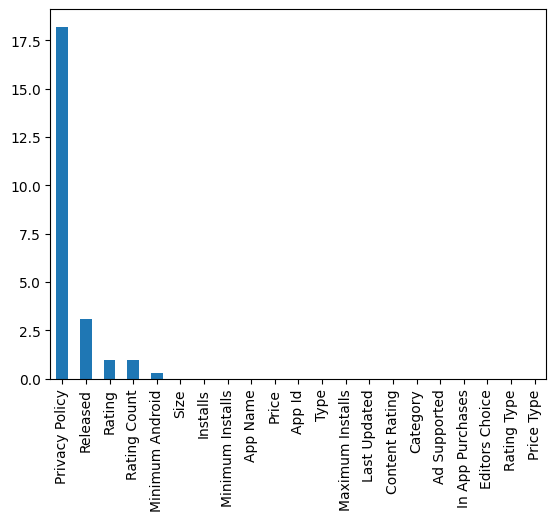

In [33]:
missing_per.plot(kind='bar')

**Missing values percentage is not large as compare to dataset, so we can drop null values**

In [34]:
app_df=app_df.dropna()
app_df.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Type                0
Price               0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Privacy Policy      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Rating Type         0
Price Type          0
dtype: int64

In [35]:
app_df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated
count,1.829861e+06,1.829861e+06,1.829861e+06,1.829861e+06,1.829861e+06,1.829861e+06,1829861,1829861
mean,2.237690e+00,3.319363e+03,2.088748e+05,3.645284e+05,9.401465e-02,3.577695e+00,2018-09-07 09:17:05.694300416,2020-01-28 13:40:28.557578240
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010-01-28 00:00:00,2009-02-09 00:00:00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,0.000000e+00,1.000000e+00,2017-07-30 00:00:00,2019-07-03 00:00:00
50%,3.100000e+00,6.000000e+00,5.000000e+02,8.340000e+02,0.000000e+00,3.000000e+00,2019-03-26 00:00:00,2020-06-16 00:00:00
75%,4.300000e+00,4.900000e+01,5.000000e+03,8.972000e+03,0.000000e+00,5.000000e+00,2020-04-07 00:00:00,2021-02-17 00:00:00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,1.000000e+03,2021-06-15 00:00:00,2021-06-16 00:00:00
std,2.099072e+00,2.195919e+05,1.562310e+07,2.407137e+07,2.536472e+00,3.246889e+00,NaN,NaN


In [36]:
category_app_count=app_df['Category'].value_counts().sort_values(ascending=False).reset_index()
category_app_count

,Category,count
0,Education,188710
1,Music & Audio,135128
2,Business,118896
3,Entertainment,107136
4,Tools,101735
5,Lifestyle,100714
6,Books & Reference,89339
7,Personalization,70359
8,Health & Fitness,68747
9,Shopping,63037


<Axes: xlabel='Category', ylabel='count'>

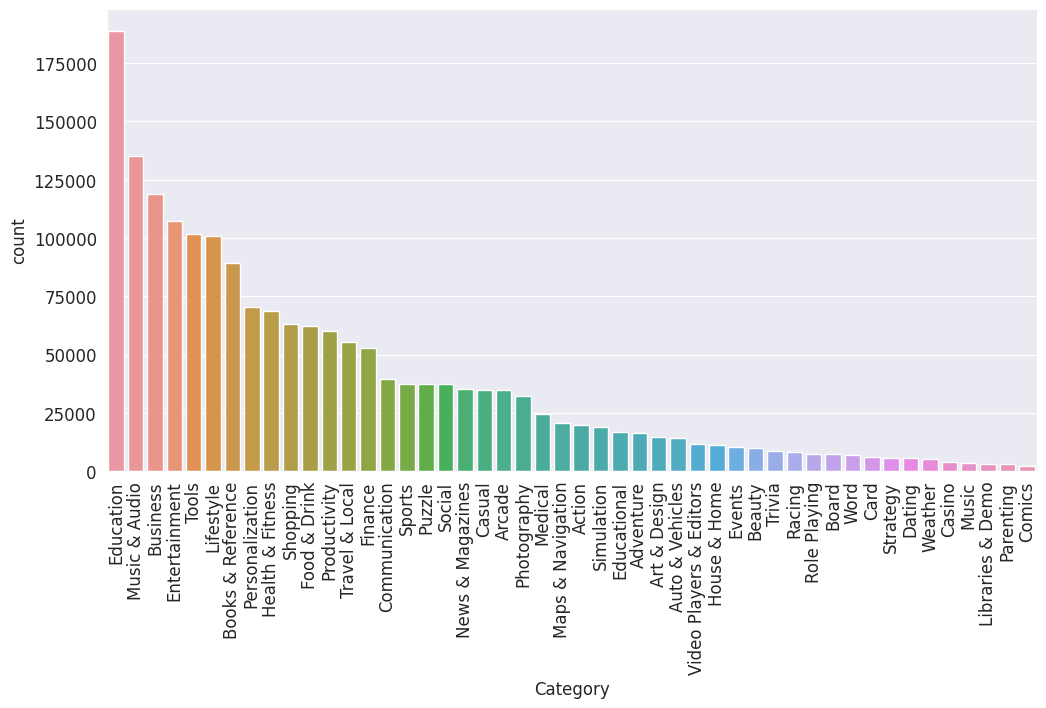

In [37]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['font.size'] = 12

plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
sns.barplot(x=category_app_count['Category'],y=category_app_count['count'])

*  Education, Music & Audio,Buisness,Entertainment,Tools are top 5 categories where most of apps are available.

In [38]:
app_df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '5+', '100,000+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [39]:
app_df['Installs']=app_df['Installs'].str.replace(",","")
app_df['Installs']=app_df['Installs'].str.split('+').str[0]
app_df['Installs'].unique()


array(['10', '5000', '50', '100', '1000', '500', '50000', '10000', '1',
       '500000', '5', '100000', '10000000', '1000000', '5000000', '0',
       '100000000', '50000000', '1000000000', '500000000', '5000000000',
       '10000000000'], dtype=object)

In [40]:
app_df['Installs'].isna().any()

False

In [41]:
app_df['Installs']=app_df['Installs'].astype('int')


In [42]:
app_category_install=app_df.groupby(['Category'])[['Installs']].sum().sort_values(by='Installs',ascending=False)
app_category_install

,Installs
Category,
Tools,58277058044
Communication,41423915378
Productivity,26859476653
Photography,18590539567
Video Players & Editors,17847752401
Action,16882210537
Casual,16245794264
Entertainment,15186799282
Arcade,13983532267


<Axes: xlabel='Category'>

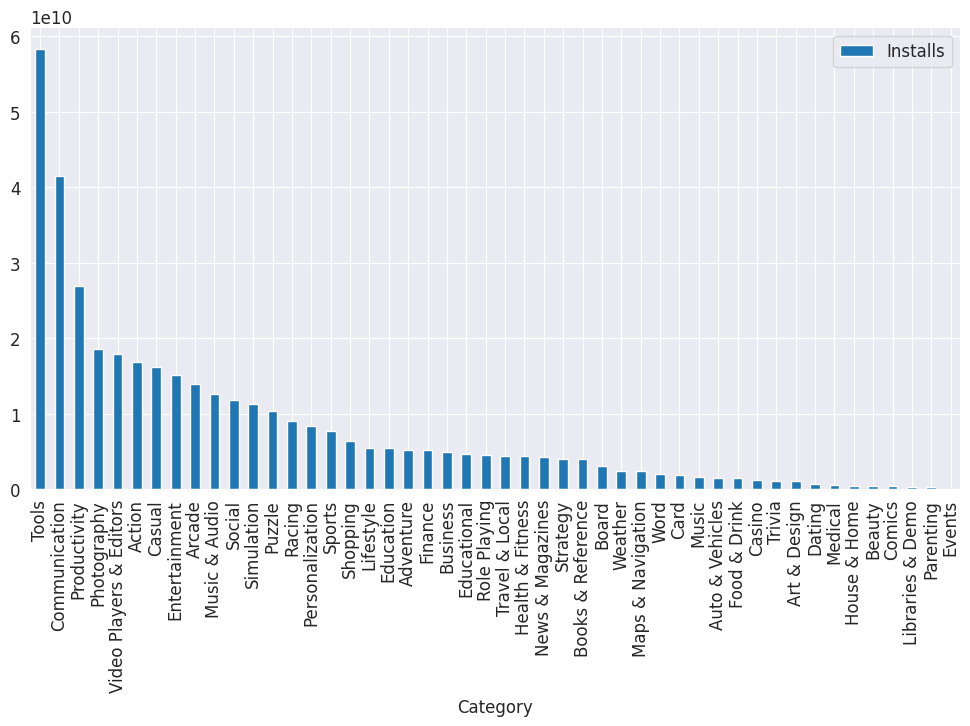

In [43]:
app_category_install.plot(kind='bar')

* Tools, Communication,Productivity,Photography,Video Players & Editors are top most installed categories.

In [44]:
app_category_install=app_category_install.reset_index()
app_category_install['Category'].head(10)

0                      Tools
1              Communication
2               Productivity
3                Photography
4    Video Players & Editors
5                     Action
6                     Casual
7              Entertainment
8                     Arcade
9              Music & Audio
Name: Category, dtype: object

([<matplotlib.patches.Wedge at 0x7a4d1ecbb700>,
 [Text(0.7900583114561558, 0.765380862380977, 'Tools'),
  Text(-0.5420418067951299, 0.9571784993857057, 'Communication'),
  Text(-1.0870045426429247, 0.1685856585645589, 'Productivity'),
  Text(-0.9922599937631312, -0.4747842718300502, 'Photography'),
  Text(-0.6598647609467035, -0.8801014130546264, 'Video Players & Editors'),
  Text(-0.20206741100978065, -1.0812810741929244, 'Action'),
  Text(0.2750214267114446, -1.0650648876240365, 'Casual'),
  Text(0.6811515820078503, -0.8637317421099, 'Entertainment'),
  Text(0.9557744436572106, -0.5445137398190698, 'Arcade'),
  Text(1.0847696985208055, -0.1824135443739885, 'Music & Audio')],
 [Text(0.4309408971579031, 0.41748047038962377, '24%'),
  Text(-0.29565916734279807, 0.522097363301294, '17%'),
  Text(-0.5929115687143225, 0.09195581376248665, '11%'),
  Text(-0.5412327238707988, -0.25897323918002735, '8%'),
  Text(-0.3599262332436564, -0.48005531621161435, '8%'),
  Text(-0.11021858782351672, -0

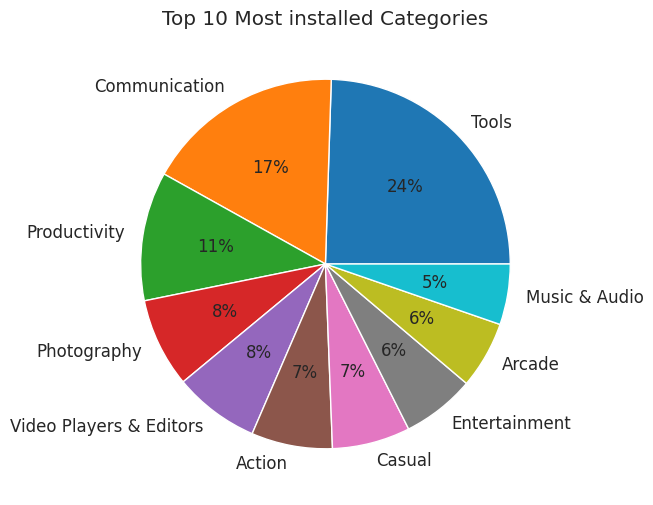

In [45]:
plt.title('Top 10 Most installed Categories')
plt.pie(app_category_install['Installs'].head(10),labels=app_category_install['Category'].head(10),autopct='%.0f%%')

In [46]:
free_or_paid=pd.crosstab(app_df['Category'],app_df['Type']).sort_values(by='Paid',ascending=False)
free_or_paid

Type,Free,Paid
Category,,
Education,184140,4570
Tools,99315,2420
Personalization,68292,2067
Books & Reference,87329,2010
Productivity,58846,1137
Travel & Local,54522,1064
Music & Audio,134109,1019
Educational,15760,1004
Lifestyle,99750,964


<Axes: xlabel='Category'>

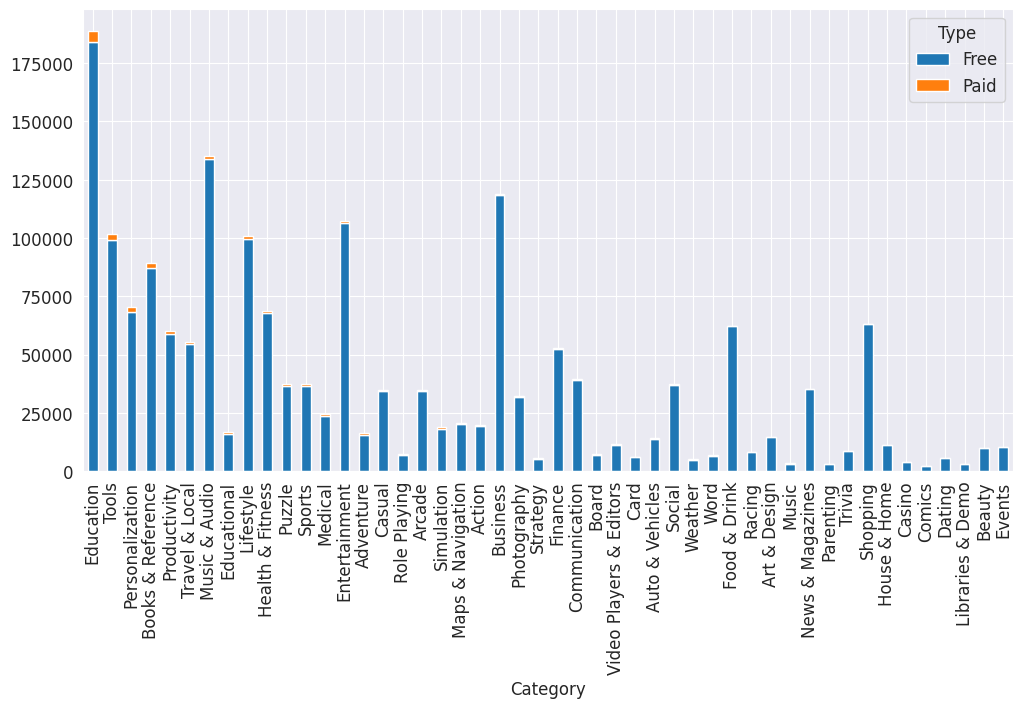

In [47]:
free_or_paid.plot(kind='bar',stacked=True)

* Education, Tools, Personalization,Books & references and Productivity are the top most categories where paid apps are available

In [48]:
category_rating=app_df.groupby(['Category'])[['Rating']].sum().sort_values(by='Rating',ascending=False)
category_rating

,Rating
Category,
Education,428239.7
Music & Audio,302467.0
Entertainment,268653.0
Tools,246076.6
Books & Reference,219856.6
Personalization,199005.9
Lifestyle,191065.4
Business,173935.2
Finance,130644.3


<Axes: xlabel='Category'>

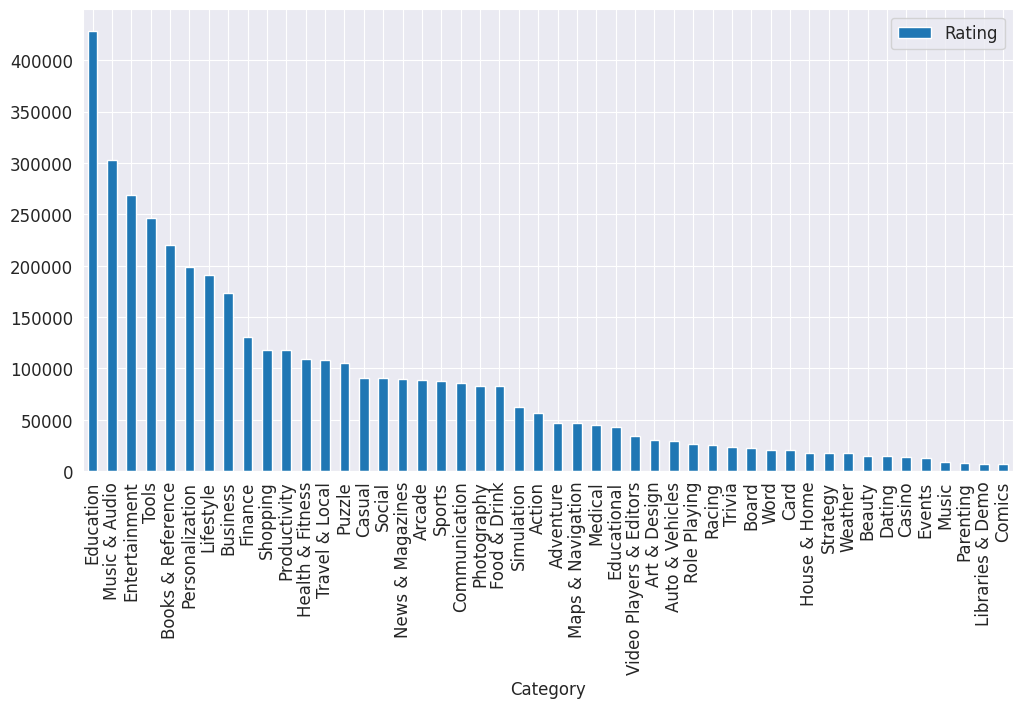

In [49]:
category_rating.plot(kind='bar')

In [50]:
plt.title('Content Rating and Maximum Installs')
sns.scatterplot(x='Maximum Installs',y='Rating Count',hue='Content Rating', data=app_df)

<Axes: title={'center': 'Content Rating and Maximum Installs'}, xlabel='Maximum Installs', ylabel='Rating Count'>

Error in callback <function _draw_all_if_interactive at 0x7a4dd14d2b00> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x7a4dd14d1e10> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

* If Everyone is getting ignored then, Teen have higher rating count than audults.

In [67]:
top_paid_Installed_app=app_df[(app_df['Type']=='Paid') & (app_df['Maximum Installs']>100000)]
top_paid_Installed_app

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Type,Price,...,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Type
1057,King of Defense Premium: Tower Defense Offline,com.gcenter.kingofdefense.merge.tower.td,Strategy,4.5,3727.0,100000,100000.0,151145,Paid,0.99,...,4.1,2020-07-01,2021-05-15,Teen,https://gcenter-com.webnode.vn/privacy-policy/,True,True,False,Between 1k to 10K,LOW
1615,Teeny Titans - Teen Titans Go!,com.turner.ttgfigures,Strategy,4.4,27251.0,100000,100000.0,452171,Paid,3.99,...,5.0,2016-06-22,2020-04-02,Teen,http://www.cartoonnetwork.com/legal/priv_tou.h...,True,False,False,Between 10k to 50K,LOW
1815,Survivalcraft,com.candyrufusgames.survivalcraft,Action,4.3,64696.0,500000,500000.0,954762,Paid,3.99,...,4.1,2012-10-14,2019-10-16,Teen,https://kaalus.wordpress.com/survivalcraft-pri...,False,False,False,More Than 50k,LOW
2313,Botanicula,air.com.amanitadesign.botanicula,Adventure,4.6,8277.0,100000,100000.0,120114,Paid,4.99,...,4.3,2014-10-11,2021-05-28,Teen,http://amanita-design.net/privacy-policy.html,False,False,False,Between 1k to 10K,LOW
2804,ezPDF Reader PDF Annotate Form,udk.android.reader,Productivity,3.3,25677.0,500000,500000.0,742811,Paid,3.99,...,4.0,2010-10-01,2020-05-15,Everyone,http://www.unidocs.com/Privacy_Policy.html,False,True,False,Between 10k to 50K,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302525,SkanApp hands-free PDF book scanner,com.go2get.skanapp,Productivity,3.4,1814.0,100000,100000.0,466815,Paid,19.99,...,4.4,2016-12-07,2021-04-04,Everyone,http://www.go2get.com/privacy-policy-skanapp.html,False,False,False,Between 1k to 10K,MEDIUM
2302576,Krix Icon Pack,com.anticor.krix,Personalization,4.1,1158.0,100000,100000.0,241446,Paid,1.99,...,4.0.3,2016-05-04,2019-08-23,Everyone,https://docs.google.com/document/d/1HEBOGRK6tA...,True,True,False,Between 1k to 10K,LOW
2306831,Ruby Square: logical puzzle game (700 levels),com.appsogreat.rubysquare.puzzle.release,Puzzle,3.9,1240.0,100000,100000.0,213765,Paid,0.99,...,4.1,2018-03-17,2020-12-11,Everyone,https://docs.google.com/document/d/1v9DOoeN3pQ...,True,True,False,Between 1k to 10K,LOW
2307228,ePSXe for Android,com.epsxe.ePSXe,Arcade,4.6,48473.0,1000000,1000000.0,1269511,Paid,3.75,...,2.3,2012-08-29,2019-12-21,Everyone,http://epsxe.com/android/privacy-policy-androi...,False,False,False,Between 10k to 50K,LOW


In [69]:
top_paid_Installed_rated_app=top_paid_Installed_app.groupby(['App Name'])[['Rating']].max().sort_values(by='Rating',ascending=False).reset_index().head(10)
top_paid_Installed_rated_app

,App Name,Rating
0,Calculator Plus,5.0
1,The Room Three,4.9
2,Sleep as Android Unlock 💤 Sleep cycle smart alarm,4.9
3,The Room: Old Sins,4.9
4,The Room Two,4.9
5,Periodic Table 2021 PRO - Chemistry,4.9
6,Rusty Lake Paradise,4.8
7,Fluid Simulation - Trippy Stress Reliever,4.8
8,Monument Valley 2,4.8
9,Bloons TD 6,4.8


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Top 10 Paid Rated App'}, xlabel='Rating', ylabel='App Name'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


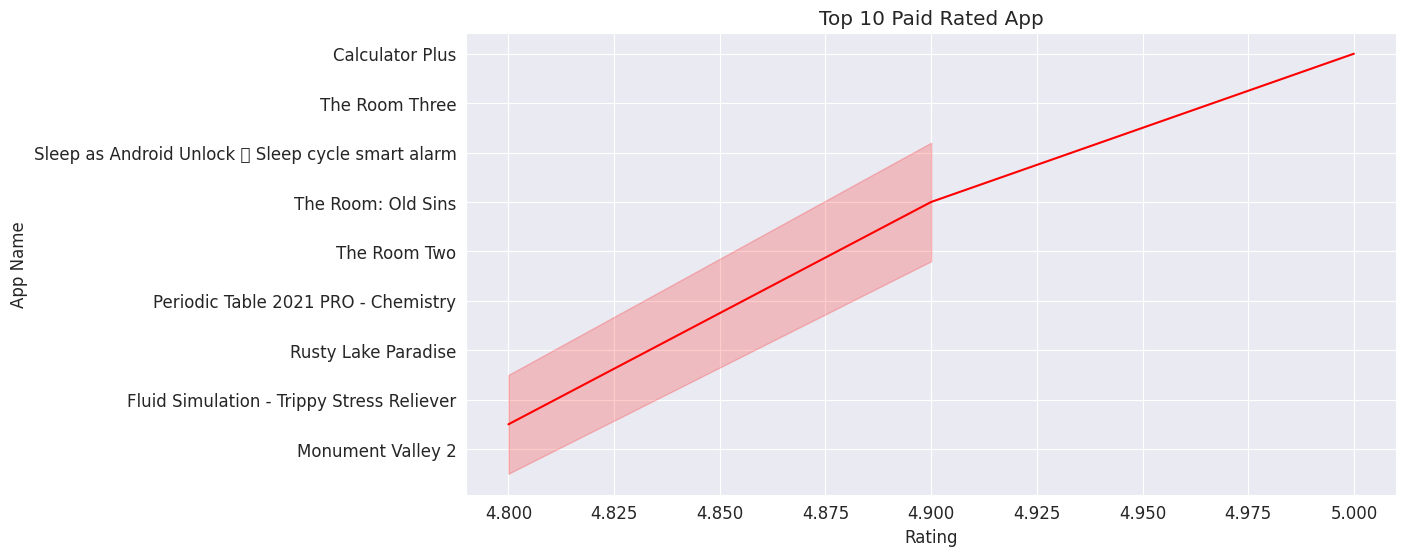

In [71]:
plt.title('Top 10 Paid Rated App')
plt.ylabel('App Name')
plt.xlabel('Rating')
sns.lineplot(x=top_paid_Installed_rated_app['Rating'],y=top_paid_Installed_rated_app['App Name'],color='Red')

In [72]:
top_free_installed_app=app_df[(app_df['Type']=='Free') & (app_df['Installs']>100000)]
top_free_installed_app

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Type,Price,...,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Rating Type,Price Type
23,Coloring Book Barbaie,com.bisgumah.barbie,Entertainment,3.8,736.0,500000,500000.0,646456,Free,0.0,...,5.0,2019-04-21,2020-11-13,Everyone,https://docs.google.com/document/d/1kUDGpRA8fF...,True,False,False,Less Than 1K,Free
92,Car Games Revival: Car Racing Games for Kids,com.lf.real.extreme.suv.offroad.drive.games.free,Racing,3.9,55218.0,10000000,10000000.0,30052692,Free,0.0,...,4.4,2016-11-09,2021-06-12,Everyone,http://www.abstron.com/legal/privacy.html,True,True,False,More Than 50k,Free
125,Smart File Manager,com.smartwho.SmartFileManager,Productivity,4.4,18241.0,1000000,1000000.0,3741253,Free,0.0,...,4.0.3,2011-02-21,2021-01-01,Everyone,http://whoissmart.net/privacy/en/index.html,True,False,False,Between 10k to 50K,Free
183,Transmute Robot Superhero,com.crsh.transmute.robotsuperhero,Lifestyle,3.9,3157.0,1000000,1000000.0,3986369,Free,0.0,...,5.0,2017-03-31,2020-08-17,Teen,http://crushiz.blogspot.mx/,True,True,False,Between 1k to 10K,Free
261,Photo Collage,com.ss.instacollage,Photography,3.6,1093.0,1000000,1000000.0,2534748,Free,0.0,...,2.3,2014-07-03,2018-09-26,Everyone,http://45.63.22.220/policy/policy.html,True,False,False,Between 1k to 10K,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312589,3 Days to Die - Escape Horror Game,com.night.die.horror.excape.game,Arcade,4.2,23586.0,1000000,1000000.0,3523403,Free,0.0,...,4.4,2019-03-23,2020-07-23,Teen,https://funstormstudio.wixsite.com/privacypolicy,True,True,False,Between 10k to 50K,Free
2312677,Modern Strike : Multiplayer FPS - Critical Action,com.shoot.hotheadgame.anti,Role Playing,3.9,78351.0,10000000,10000000.0,24015387,Free,0.0,...,4.4,2020-08-06,2021-05-12,Teen,http://unity3d.com/cn/legal/privacy-policy,True,True,False,More Than 50k,Free
2312931,Driving Day,com.day.drivingday,Entertainment,2.8,1002.0,500000,500000.0,590469,Free,0.0,...,4.0.3,2020-06-10,2020-06-10,Everyone,https://docs.google.com/document/d/1I310VsRWy8...,True,False,False,Between 1k to 10K,Free
2312932,Hopeless 2: Cave Escape,com.upopa.hopeless2,Action,4.3,103466.0,5000000,5000000.0,7274660,Free,0.0,...,4.0.3,2015-10-29,2017-03-06,Teen,http://www.upopa.com/games/hopeless2/privacypo...,True,True,False,More Than 50k,Free


In [76]:
top_free_installed_rated_app=top_free_installed_app.groupby('App Name')[['Rating']].max().sort_values(by='Rating',ascending=False).reset_index().head(10)
top_free_installed_rated_app

,App Name,Rating
0,Stickman Offroad Transporter Truck Cargo,5.0
1,Policer - Men Women Police photo suit Editor Set,5.0
2,АТИ Грузы и Транспорт,5.0
3,Glitch Video Effect - Glitch FX,5.0
4,Ant Robot Car Transforming Games – Car Robot Game,5.0
5,Modern FPS Shooting Strike: Counter Terrorist ...,5.0
6,Toddler Games For 2-5 Year Olds: 45 Learning G...,5.0
7,Music player,5.0
8,Flying Ghost Robot Car Game: Transform robot G...,5.0
9,Wedding Photo Frame: Cut Paste Editor,5.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='App Name', ylabel='Rating'>

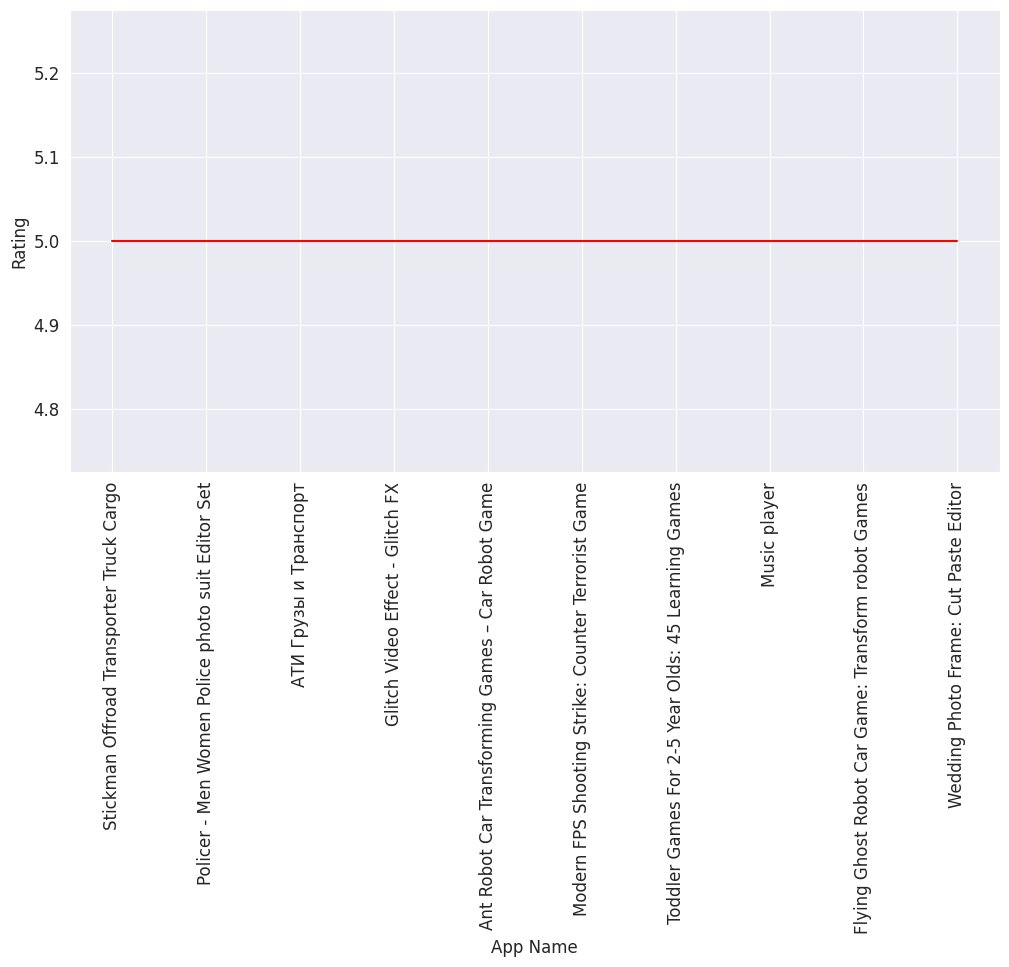

In [78]:
plt.ylabel("Rating")
plt.xlabel('App Name')
plt.xticks(rotation=90)
sns.lineplot(y=top_free_installed_rated_app['Rating'],x=top_free_installed_rated_app['App Name'],color='red')